In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd 'drive/My Drive/Siamese/Encoder/Freq'

/content/drive/My Drive/Siamese/Encoder/Freq


In [3]:
import sys
sys.path.insert(0, '../../Data')
sys.path.insert(0, '../..')
sys.path.insert(0, '..')

In [4]:
!pip install torchaudio

In [5]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import Compose

from tqdm import tqdm

In [6]:
DATASET_PATH = '/content/drive/My Drive/DataSet'
EPOCH_NUM = 1

torch.backends.cudnn.deterministic = True
B = 64

WEIGHT_DECAY = 5e-4
LR_INIT = 1e-2
LR_LAST = 1e-4
# lr scheduler parameter
gamma = 10 ** (np.log10(LR_LAST / LR_INIT) / (EPOCH_NUM - 1))
MOMENTUM = 0.9
NUM_WORKERS = 4

NUM_CLASSES = 200

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


In [7]:
from Normalize import Normalize
from ToTensor import ToTensor
from IdentificationDataset import IdentificationDataset
from IdentificationDataset import ReturnType

DATASET_PATH = '/content/drive/My Drive/DataSet'

transforms = Compose([
    Normalize(),
    ToTensor()
])


In [8]:
from Time import Time

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)
net = Time(avg=False)
encoder_path = '/content/drive/My Drive/Siamese/Encoder/Saved/encoder_time_1.pt'
net.load_state_dict(torch.load(encoder_path))
net.to(DEVICE)

cuda


Time(
  (block0): Conv1DBlock(
    (conv): Conv1d(1, 16, kernel_size=(9,), stride=(2,))
    (acti): ReLU()
    (bn): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool1d(kernel_size=9, stride=8, padding=0, dilation=1, ceil_mode=False)
  )
  (block1): Conv1DBlock(
    (conv): Conv1d(16, 128, kernel_size=(9,), stride=(2,))
    (acti): ReLU()
    (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool1d(kernel_size=9, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Conv1DBlock(
    (conv): Conv1d(128, 256, kernel_size=(9,), stride=(2,))
    (acti): ReLU()
    (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool1d(kernel_size=9, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Conv1DBlock(
    (conv1): Conv1d(256, 64, kernel_size=(1,), stride=(1,))
    (conv2): Conv1d(256, 192, kernel_size=(3,),

In [9]:
import numpy as np

max_accuracy = 0
test_accuracy1 = []

test_loss = 0
test_losses1 = []

net.eval()
print("*** Test ***")

for cross_id in range(1, 10):
    print("*** Cross id ", cross_id, " ***")
    
    testset = IdentificationDataset(DATASET_PATH, 
                                20,
                                train=False, 
                                transform=transforms,
                                lenght=1,
                                return_type=ReturnType.ENCODER,
                                cross_id=cross_id)
    testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=4, 
                                            num_workers=NUM_WORKERS)

    # test    
    accuracy = 0
    nb_test = 0
    loss = 0

    for iter_num, (label, a, p, n_label, n) in tqdm(enumerate(testsetloader)):
        a, p, n = a.to(DEVICE), p.to(DEVICE), n.to(DEVICE)
        loss, results, a, p, n = net(a, p , n)

        # Calculate loss
        test_loss += loss.item()

        for result in results:
          nb_test += 1
          if result == True:
            accuracy += 1
    
    accuracy /= nb_test
    test_accuracy1.append(accuracy)
    print("accuracy = ", accuracy)
    test_loss /= len(testsetloader)
    test_losses1.append(test_loss)
    print("loss = ", test_loss)

*** Test ***
*** Cross id  1  ***
sample lenght  1 seconds


659it [00:11, 59.14it/s]

accuracy =  0.6761579347000759
loss =  0.9501363119966886
*** Cross id  2  ***
sample lenght  1 seconds



582it [00:09, 59.04it/s]

accuracy =  0.7845161290322581
loss =  0.6486519762674775
*** Cross id  3  ***
sample lenght  1 seconds



673it [00:11, 61.03it/s]

accuracy =  0.7773234200743494
loss =  0.6627751922106732
*** Cross id  4  ***
sample lenght  1 seconds



482it [00:07, 61.15it/s]

accuracy =  0.7977178423236515
loss =  0.6204573996901958
*** Cross id  5  ***
sample lenght  1 seconds



630it [00:10, 60.57it/s]

accuracy =  0.7759237187127532
loss =  0.6776891243659693
*** Cross id  6  ***
sample lenght  1 seconds



555it [00:09, 60.62it/s]

accuracy =  0.7718665464382326
loss =  0.6959596182656008
*** Cross id  7  ***
sample lenght  1 seconds



592it [00:10, 58.65it/s]

accuracy =  0.8126849894291754
loss =  0.5709427035180016
*** Cross id  8  ***
sample lenght  1 seconds



859it [00:15, 57.03it/s]

accuracy =  0.8262514551804424
loss =  0.5162498845529879
*** Cross id  9  ***
sample lenght  1 seconds



498it [00:08, 58.64it/s]

accuracy =  0.7790055248618785
loss =  0.6374158762093912


In [10]:
from TransFourier import TransFourier

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)
net = Time(avg=False)
encoder_path = '/content/drive/My Drive/Siamese/Encoder/Saved/encoder_time_2.pt'
net.load_state_dict(torch.load(encoder_path))
net.to(DEVICE)

cuda


Time(
  (block0): Conv1DBlock(
    (conv): Conv1d(1, 16, kernel_size=(9,), stride=(2,))
    (acti): ReLU()
    (bn): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool1d(kernel_size=9, stride=8, padding=0, dilation=1, ceil_mode=False)
  )
  (block1): Conv1DBlock(
    (conv): Conv1d(16, 128, kernel_size=(9,), stride=(2,))
    (acti): ReLU()
    (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool1d(kernel_size=9, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Conv1DBlock(
    (conv): Conv1d(128, 256, kernel_size=(9,), stride=(2,))
    (acti): ReLU()
    (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool1d(kernel_size=9, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Conv1DBlock(
    (conv1): Conv1d(256, 64, kernel_size=(1,), stride=(1,))
    (conv2): Conv1d(256, 192, kernel_size=(3,),

In [11]:
import numpy as np

max_accuracy = 0
test_accuracy2 = []

test_loss = 0
test_losses2 = []

net.eval()
print("*** Test ***")

for cross_id in range(1, 10):
    print("*** Cross id ", cross_id, " ***")
    
    testset = IdentificationDataset(DATASET_PATH, 
                                20,
                                train=False, 
                                transform=transforms,
                                lenght=2,
                                return_type=ReturnType.ENCODER,
                                cross_id=cross_id)
    testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=4, 
                                            num_workers=NUM_WORKERS)

    # test    
    accuracy = 0
    nb_test = 0
    loss = 0

    for iter_num, (label, a, p, n_label, n) in tqdm(enumerate(testsetloader)):
        a, p, n = a.to(DEVICE), p.to(DEVICE), n.to(DEVICE)
        loss, results, a, p, n = net(a, p , n)

        # Calculate loss
        test_loss += loss.item()

        for result in results:
          nb_test += 1
          if result == True:
            accuracy += 1
    
    accuracy /= nb_test
    test_accuracy2.append(accuracy)
    print("accuracy = ", accuracy)
    test_loss /= len(testsetloader)
    test_losses2.append(test_loss)
    print("loss = ", test_loss)

*** Test ***
*** Cross id  1  ***
sample lenght  2 seconds


659it [00:11, 56.44it/s]

accuracy =  0.6708428246013668
loss =  0.9802622580745333
*** Cross id  2  ***
sample lenght  2 seconds



582it [00:10, 55.98it/s]

accuracy =  0.8047311827956989
loss =  0.5831557648124936
*** Cross id  3  ***
sample lenght  2 seconds



673it [00:11, 56.41it/s]

accuracy =  0.8011152416356877
loss =  0.6063138537233248
*** Cross id  4  ***
sample lenght  2 seconds



482it [00:08, 57.03it/s]

accuracy =  0.8163900414937759
loss =  0.5703558974354729
*** Cross id  5  ***
sample lenght  2 seconds



630it [00:10, 59.61it/s]


accuracy =  0.7961859356376639
loss =  0.5973695424897472
*** Cross id  6  ***
sample lenght  2 seconds


555it [00:09, 59.38it/s]

accuracy =  0.8025247971145176
loss =  0.6075411738410911
*** Cross id  7  ***
sample lenght  2 seconds



592it [00:09, 59.80it/s]

accuracy =  0.8219873150105709
loss =  0.5262238418534827
*** Cross id  8  ***
sample lenght  2 seconds



859it [00:14, 59.59it/s]

accuracy =  0.8373108265424912
loss =  0.4968569111531998
*** Cross id  9  ***
sample lenght  2 seconds



498it [00:08, 60.26it/s]

accuracy =  0.843294826720241
loss =  0.471059496110643


In [12]:
from TransFourier import TransFourier

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)
net = Time(avg=False)
encoder_path = '/content/drive/My Drive/Siamese/Encoder/Saved/encoder_time_3.pt'
net.load_state_dict(torch.load(encoder_path))
net.to(DEVICE)

cuda


Time(
  (block0): Conv1DBlock(
    (conv): Conv1d(1, 16, kernel_size=(9,), stride=(2,))
    (acti): ReLU()
    (bn): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool1d(kernel_size=9, stride=8, padding=0, dilation=1, ceil_mode=False)
  )
  (block1): Conv1DBlock(
    (conv): Conv1d(16, 128, kernel_size=(9,), stride=(2,))
    (acti): ReLU()
    (bn): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool1d(kernel_size=9, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (block2): Conv1DBlock(
    (conv): Conv1d(128, 256, kernel_size=(9,), stride=(2,))
    (acti): ReLU()
    (bn): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (maxpool): MaxPool1d(kernel_size=9, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (block3): Conv1DBlock(
    (conv1): Conv1d(256, 64, kernel_size=(1,), stride=(1,))
    (conv2): Conv1d(256, 192, kernel_size=(3,),

In [18]:
import numpy as np

max_accuracy = 0
test_accuracy3 = []

test_loss = 0
test_losses3 = []

net.eval()
print("*** Test ***")

for cross_id in range(1, 10):
    print("*** Cross id ", cross_id, " ***")
    
    testset = IdentificationDataset(DATASET_PATH, 
                                20,
                                train=False, 
                                transform=transforms,
                                lenght=3,
                                return_type=ReturnType.ENCODER,
                                cross_id=cross_id)
    testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=4, 
                                            num_workers=NUM_WORKERS)

    # test    
    accuracy = 0
    nb_test = 0
    loss = 0

    for iter_num, (label, a, p, n_label, n) in tqdm(enumerate(testsetloader)):
        a, p, n = a.to(DEVICE), p.to(DEVICE), n.to(DEVICE)
        loss, results, a, p, n = net(a, p , n)

        # Calculate loss
        test_loss += loss.item()

        for result in results:
          nb_test += 1
          if result == True:
            accuracy += 1
    
    accuracy /= nb_test
    test_accuracy3.append(accuracy)
    print("accuracy = ", accuracy)
    test_loss /= len(testsetloader)
    test_losses3.append(test_loss)
    print("loss = ", test_loss)

*** Test ***
*** Cross id  1  ***
sample lenght  3 seconds


659it [00:12, 54.87it/s]

accuracy =  0.6788154897494305
loss =  0.9978934680655802
*** Cross id  2  ***
sample lenght  3 seconds



582it [00:10, 55.08it/s]

accuracy =  0.7793548387096774
loss =  0.6490575515792465
*** Cross id  3  ***
sample lenght  3 seconds



673it [00:12, 54.91it/s]

accuracy =  0.7635687732342007
loss =  0.6935776825680311
*** Cross id  4  ***
sample lenght  3 seconds



482it [00:08, 54.85it/s]

accuracy =  0.7811203319502075
loss =  0.6412819308108343
*** Cross id  5  ***
sample lenght  3 seconds



630it [00:11, 55.02it/s]

accuracy =  0.799761620977354
loss =  0.5994159556069175
*** Cross id  6  ***
sample lenght  3 seconds



555it [00:10, 54.47it/s]


accuracy =  0.7867448151487827
loss =  0.6585950674195615
*** Cross id  7  ***
sample lenght  3 seconds


592it [00:10, 54.66it/s]

accuracy =  0.8329809725158562
loss =  0.5195714132309195
*** Cross id  8  ***
sample lenght  3 seconds



859it [00:15, 55.22it/s]

accuracy =  0.830908032596042
loss =  0.5227717770288931
*** Cross id  9  ***
sample lenght  3 seconds



498it [00:08, 55.50it/s]

accuracy =  0.8312405826217981
loss =  0.5229861961543072


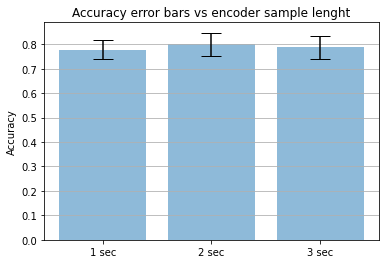

In [17]:
import numpy as np
import matplotlib.pyplot as plt

mean1 = np.mean(test_accuracy1)
std1 = np.std(test_accuracy1)
mean2 = np.mean(test_accuracy2)
std2 = np.std(test_accuracy2)
mean3 = np.mean(test_accuracy3)
std3 = np.std(test_accuracy3)

mean = [mean1, mean2, mean3]
std = [std1, std2, std3]
labels = ['1 sec', '2 sec', '3 sec']
x_pos = np.arange(len(labels))

# Build the plot
fig, ax = plt.subplots()
ax.bar(x_pos, 
       mean,
       yerr=std,
       align='center',
       alpha=0.5,
       ecolor='black',
       capsize=10)
ax.set_ylabel('Accuracy')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.set_title('Accuracy error bars vs encoder sample lenght')
ax.yaxis.grid(True)





In [15]:
print(mean)
print(std)

[0.777938617861424, 0.7993758879502237, 0.7871661619448165]
[0.03996898249347171, 0.04800605880261408, 0.045348036274110805]
